In [1]:
# We perform sentiment analysis using Logistic regression, Logistic regression with TFIDF vectorizer and Logistic regression with TFIDF vectorizer and n-grams techniques 

# We then analyze the accuracy of the models and also determine the best approach

# Identify the highest-used words in each set of reviews, when grouped by rating 

# Apply the Navies bayes to get predict the positive or negative sentiment of Text review.

# Importing the Required Libraries

In [2]:

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame 
import nltk
import sqlite3
import csv
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from scipy.spatial.distance import cosine
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
import matplotlib as mpl
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn import metrics

import re
import string
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import mean_squared_error

## To Read the Data from JSON File

In [3]:
mobile_df = pd.read_json('Cell_Phones_and_Accessories_5.json',lines=True)

In [4]:
mobile_df

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,120401325X,"[0, 0]",4,They look good and stick good! I just don't li...,"05 21, 2014",A30TL5EWN6DFXT,christina,Looks Good,1400630400
1,120401325X,"[0, 0]",5,These stickers work like the review says they ...,"01 14, 2014",ASY55RVNIL0UD,emily l.,Really great product.,1389657600
2,120401325X,"[0, 0]",5,These are awesome and make my phone look so st...,"06 26, 2014",A2TMXE2AFO7ONB,Erica,LOVE LOVE LOVE,1403740800
3,120401325X,"[4, 4]",4,Item arrived in great time and was in perfect ...,"10 21, 2013",AWJ0WZQYMYFQ4,JM,Cute!,1382313600
4,120401325X,"[2, 3]",5,"awesome! stays on, and looks great. can be use...","02 3, 2013",ATX7CZYFXI1KW,patrice m rogoza,leopard home button sticker for iphone 4s,1359849600
5,120401325X,"[1, 2]",3,These make using the home button easy. My daug...,"10 12, 2013",APX47D16JOP7H,RLH,Cute,1381536000
6,120401325X,"[0, 0]",5,Came just as described.. It doesn't come unstu...,"08 22, 2013",A1JVVYYO7G56DS,Tyler Evans,best thing ever..,1377129600
7,3998899561,"[1, 2]",1,it worked for the first week then it only char...,"11 21, 2013",A6FGO4TBZ3QFZ,Abdullah Albyati,not a good Idea,1384992000
8,3998899561,"[2, 3]",5,"Good case, solid build. Protects phone all aro...","09 25, 2013",A2JWEDW5FSVB0F,Adam,Solid Case,1380067200
9,3998899561,"[1, 1]",5,This is a fantastic case. Very stylish and pro...,"04 3, 2014",A8AJS1DW7L3JJ,Agata Majchrzak,Perfect Case,1396483200


### This Displays the New Data Frame With One Useful Attribute Along With its Product ID

In [5]:
assist = mobile_df[['helpful','asin']]

In [6]:
assist

,helpful,asin
0,"[0, 0]",120401325X
1,"[0, 0]",120401325X
2,"[0, 0]",120401325X
3,"[4, 4]",120401325X
4,"[2, 3]",120401325X
5,"[1, 2]",120401325X
6,"[0, 0]",120401325X
7,"[1, 2]",3998899561
8,"[2, 3]",3998899561
9,"[1, 1]",3998899561


In [7]:
df = pd.DataFrame(assist)

In [8]:
df[['helpful','total']] = pd.DataFrame(df.helpful.values.tolist(), index=df.index)
dfhelpful = df[['asin', 'helpful','total']]

In [9]:
dfhelpful

,asin,helpful,total
0,120401325X,0,0
1,120401325X,0,0
2,120401325X,0,0
3,120401325X,4,4
4,120401325X,2,3
5,120401325X,1,2
6,120401325X,0,0
7,3998899561,1,2
8,3998899561,2,3
9,3998899561,1,1


In [10]:
dfNew = mobile_df.drop('helpful',1)

In [11]:
frames = [dfNew, dfhelpful]

In [12]:
mobile_df = dfNew.join(dfhelpful[['helpful','total']])


In [13]:
mobile_df

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,helpful,total
0,120401325X,4,They look good and stick good! I just don't li...,"05 21, 2014",A30TL5EWN6DFXT,christina,Looks Good,1400630400,0,0
1,120401325X,5,These stickers work like the review says they ...,"01 14, 2014",ASY55RVNIL0UD,emily l.,Really great product.,1389657600,0,0
2,120401325X,5,These are awesome and make my phone look so st...,"06 26, 2014",A2TMXE2AFO7ONB,Erica,LOVE LOVE LOVE,1403740800,0,0
3,120401325X,4,Item arrived in great time and was in perfect ...,"10 21, 2013",AWJ0WZQYMYFQ4,JM,Cute!,1382313600,4,4
4,120401325X,5,"awesome! stays on, and looks great. can be use...","02 3, 2013",ATX7CZYFXI1KW,patrice m rogoza,leopard home button sticker for iphone 4s,1359849600,2,3
5,120401325X,3,These make using the home button easy. My daug...,"10 12, 2013",APX47D16JOP7H,RLH,Cute,1381536000,1,2
6,120401325X,5,Came just as described.. It doesn't come unstu...,"08 22, 2013",A1JVVYYO7G56DS,Tyler Evans,best thing ever..,1377129600,0,0
7,3998899561,1,it worked for the first week then it only char...,"11 21, 2013",A6FGO4TBZ3QFZ,Abdullah Albyati,not a good Idea,1384992000,1,2
8,3998899561,5,"Good case, solid build. Protects phone all aro...","09 25, 2013",A2JWEDW5FSVB0F,Adam,Solid Case,1380067200,2,3
9,3998899561,5,This is a fantastic case. Very stylish and pro...,"04 3, 2014",A8AJS1DW7L3JJ,Agata Majchrzak,Perfect Case,1396483200,1,1


In [14]:
mobile_df.to_csv('Cell_Phones_and_Accessories_5.csv', sep=',', header=False,index=False)

In [15]:
mobile_df

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,helpful,total
0,120401325X,4,They look good and stick good! I just don't li...,"05 21, 2014",A30TL5EWN6DFXT,christina,Looks Good,1400630400,0,0
1,120401325X,5,These stickers work like the review says they ...,"01 14, 2014",ASY55RVNIL0UD,emily l.,Really great product.,1389657600,0,0
2,120401325X,5,These are awesome and make my phone look so st...,"06 26, 2014",A2TMXE2AFO7ONB,Erica,LOVE LOVE LOVE,1403740800,0,0
3,120401325X,4,Item arrived in great time and was in perfect ...,"10 21, 2013",AWJ0WZQYMYFQ4,JM,Cute!,1382313600,4,4
4,120401325X,5,"awesome! stays on, and looks great. can be use...","02 3, 2013",ATX7CZYFXI1KW,patrice m rogoza,leopard home button sticker for iphone 4s,1359849600,2,3
5,120401325X,3,These make using the home button easy. My daug...,"10 12, 2013",APX47D16JOP7H,RLH,Cute,1381536000,1,2
6,120401325X,5,Came just as described.. It doesn't come unstu...,"08 22, 2013",A1JVVYYO7G56DS,Tyler Evans,best thing ever..,1377129600,0,0
7,3998899561,1,it worked for the first week then it only char...,"11 21, 2013",A6FGO4TBZ3QFZ,Abdullah Albyati,not a good Idea,1384992000,1,2
8,3998899561,5,"Good case, solid build. Protects phone all aro...","09 25, 2013",A2JWEDW5FSVB0F,Adam,Solid Case,1380067200,2,3
9,3998899561,5,This is a fantastic case. Very stylish and pro...,"04 3, 2014",A8AJS1DW7L3JJ,Agata Majchrzak,Perfect Case,1396483200,1,1


## Load The CSV to SQLite3

In [16]:
class csvrd(object):
    def csvFile(self):

        self.readFile('Cell_Phones_and_Accessories_5.csv')

    def readFile(self, filename):
        conn = sqlite3.connect('amazon.db')
        cur = conn.cursor() 
        cur.execute("""CREATE TABLE IF NOT EXISTS amazonReviews(asin INT,overall INT,reviewText varchar,reviewTime INTEGER, reviewerID varchar,reviewerName varchar,summary varchar,unixReviewTime INTEGER,helpful INT,total INT)""")
        filename.encode('utf-8')
        print ("Amazon Reviews table executed")
        with open(filename) as f:
            reader = csv.reader(f)
            for field in reader:
                cur.execute("INSERT INTO amazonReviews VALUES (?,?,?,?,?,?,?,?,?,?);", field)

        print ("CSV Loaded into SQLite")
        conn.commit()
        conn.close()

c = csvrd().csvFile()

Amazon Reviews table executed
CSV Loaded into SQLite


## Read the data from SQLite

In [17]:
con = sqlite3.connect('amazon.db')

pd.read_sql_query("SELECT * FROM amazonReviews LIMIT 15", con)

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,helpful,total
0,120401325X,4,They look good and stick good! I just don't li...,"05 21, 2014",A30TL5EWN6DFXT,christina,Looks Good,1400630400,0,0
1,120401325X,5,These stickers work like the review says they ...,"01 14, 2014",ASY55RVNIL0UD,emily l.,Really great product.,1389657600,0,0
2,120401325X,5,These are awesome and make my phone look so st...,"06 26, 2014",A2TMXE2AFO7ONB,Erica,LOVE LOVE LOVE,1403740800,0,0
3,120401325X,4,Item arrived in great time and was in perfect ...,"10 21, 2013",AWJ0WZQYMYFQ4,JM,Cute!,1382313600,4,4
4,120401325X,5,"awesome! stays on, and looks great. can be use...","02 3, 2013",ATX7CZYFXI1KW,patrice m rogoza,leopard home button sticker for iphone 4s,1359849600,2,3
5,120401325X,3,These make using the home button easy. My daug...,"10 12, 2013",APX47D16JOP7H,RLH,Cute,1381536000,1,2
6,120401325X,5,Came just as described.. It doesn't come unstu...,"08 22, 2013",A1JVVYYO7G56DS,Tyler Evans,best thing ever..,1377129600,0,0
7,3998899561,1,it worked for the first week then it only char...,"11 21, 2013",A6FGO4TBZ3QFZ,Abdullah Albyati,not a good Idea,1384992000,1,2
8,3998899561,5,"Good case, solid build. Protects phone all aro...","09 25, 2013",A2JWEDW5FSVB0F,Adam,Solid Case,1380067200,2,3
9,3998899561,5,This is a fantastic case. Very stylish and pro...,"04 3, 2014",A8AJS1DW7L3JJ,Agata Majchrzak,Perfect Case,1396483200,1,1


## Here we ignore the reviews with the overall score equal to 3. If the overall score is above 3, then it is set to Positive else it will be set to Negative

In [18]:
review = pd.read_sql_query("""
SELECT 
  overall, 
  summary, 
  helpful, 
  total
FROM amazonReviews 
WHERE overall != 3""", con)

In [19]:
review.head(15)

,overall,summary,helpful,total
0,4,Looks Good,0,0
1,5,Really great product.,0,0
2,5,LOVE LOVE LOVE,0,0
3,4,Cute!,4,4
4,5,leopard home button sticker for iphone 4s,2,3
5,5,best thing ever..,0,0
6,1,not a good Idea,1,2
7,5,Solid Case,2,3
8,5,Perfect Case,1,1
9,5,Just what I needed,0,0


## Sentiment Column Tells us The Numeric Score of Being Positive or Negative. Useful Score Column Gives us The Boolean Value of The Total Number of Votes.

In [20]:
review["sentiment"] = review["overall"].apply(lambda score: "positive" if score > 3 else "negative")
review["usefulScore"] = (review["helpful"]/review["total"]).apply(lambda n: "useful" if n > 0.6 else "useless")

review.head(15)

,overall,summary,helpful,total,sentiment,usefulScore
0,4,Looks Good,0,0,positive,useless
1,5,Really great product.,0,0,positive,useless
2,5,LOVE LOVE LOVE,0,0,positive,useless
3,4,Cute!,4,4,positive,useful
4,5,leopard home button sticker for iphone 4s,2,3,positive,useful
5,5,best thing ever..,0,0,positive,useless
6,1,not a good Idea,1,2,negative,useless
7,5,Solid Case,2,3,positive,useful
8,5,Perfect Case,1,1,positive,useful
9,5,Just what I needed,0,0,positive,useless


## Display of The Rows With Overall Score 5

In [21]:
review[review.overall == 5].head(15)

,overall,summary,helpful,total,sentiment,usefulScore
1,5,Really great product.,0,0,positive,useless
2,5,LOVE LOVE LOVE,0,0,positive,useless
4,5,leopard home button sticker for iphone 4s,2,3,positive,useful
5,5,best thing ever..,0,0,positive,useless
7,5,Solid Case,2,3,positive,useful
8,5,Perfect Case,1,1,positive,useful
9,5,Just what I needed,0,0,positive,useless
10,5,A Winner,2,3,positive,useful
11,5,Absolutely love the case !!,3,3,positive,useful
12,5,Best Rechargeable Battery Case on the Market!!...,12,16,positive,useful


## Display of The Rows With Overall Score 1

In [22]:
review[review.overall == 1].head(15)

,overall,summary,helpful,total,sentiment,usefulScore
6,1,not a good Idea,1,2,negative,useless
18,1,Horrible,0,0,negative,useless
30,1,"don't waste your money, pay more and buy one a...",0,0,negative,useless
44,1,Be careful,0,0,negative,useless
67,1,bad experience,0,0,negative,useless
84,1,Poor Quality Cell Phone Charger,0,0,negative,useless
97,1,FAIL,0,0,negative,useless
102,1,Does not work.,0,0,negative,useless
111,1,Stopped Working after 1 1/2 month..,0,0,negative,useless
115,1,It works...mostly as a conversation piece sinc...,0,0,negative,useless


## Feature Extraction from reviewsText. We Assign New Dimension to Each Word and Give The Word Counts

In [23]:
regEx = re.compile('[^a-z]+')
def cleanReviews(reviewText):
    reviewText = reviewText.lower()
    reviewText = regEx.sub(' ', reviewText).strip()
    return reviewText

review["summaryClean"] = review["summary"].apply(cleanReviews)

train, test = train_test_split(review, test_size=0.2)
print("%d items in training data, %d in test data" % (len(train), len(test)))

692000 items in training data, 173000 in test data


## Use TfidfTransformer().fit_transofrm To Fit The Train and Test Data

#### Tf-idf stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.One of the simplest ranking functions is computed by summing the tf-idf for each query term; many more sophisticated ranking functions are variants of this simple model.

In [24]:
countVector = CountVectorizer(min_df = 1, ngram_range = (1, 4))
X_train_counts = countVector.fit_transform(train["summaryClean"])

#applying tfidf to term frequency
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_new_counts = countVector.transform(test["summaryClean"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

y_train = train["sentiment"]
y_test = test["sentiment"]

prediction = dict()

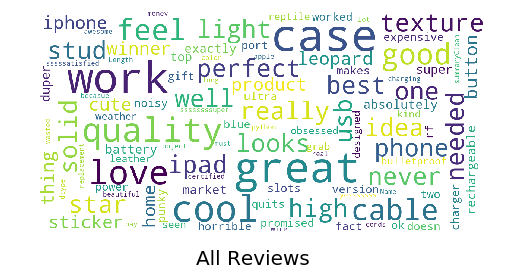

In [25]:
stopwords = set(STOPWORDS)
mpl.rcParams['font.size']=12                
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(review["summaryClean"],title = "All Reviews")

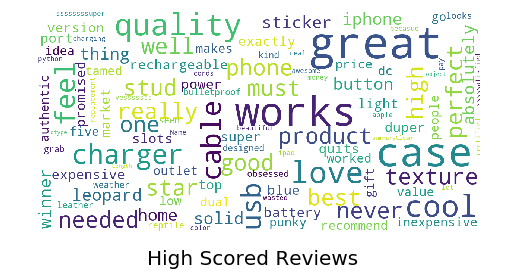

In [26]:
show_wordcloud(review[review.overall == 5]["summaryClean"], title = "High Scored Reviews")

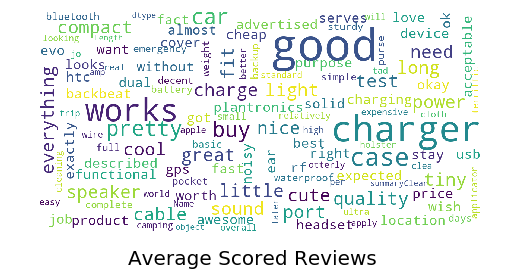

In [27]:
show_wordcloud(review[review.overall == 4]["summaryClean"], title = "Average Scored Reviews")

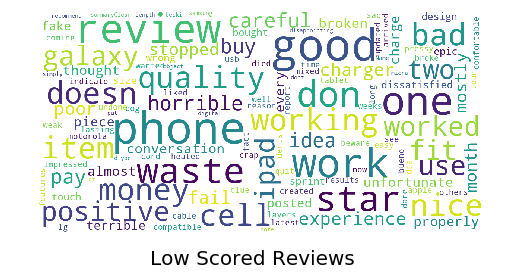

In [28]:
show_wordcloud(review[review.overall == 1]["summaryClean"], title = "Low Scored Reviews")

## Multinomial Naive Bayes learning method


In [29]:
model = MultinomialNB().fit(X_train_tfidf, y_train)
prediction['Multinomial'] = model.predict(X_test_tfidf)

## Bernoulli Naive Bayes learning method

In [30]:
model = BernoulliNB().fit(X_train_tfidf, y_train)
prediction['Bernoulli'] = model.predict(X_test_tfidf)

## Logistic Regression Learning Method

In [31]:
logreg = LogisticRegression(C=1e5)
logreg_result = logreg.fit(X_train_tfidf, y_train)
prediction['Logistic'] = logreg.predict(X_test_tfidf)

## Results

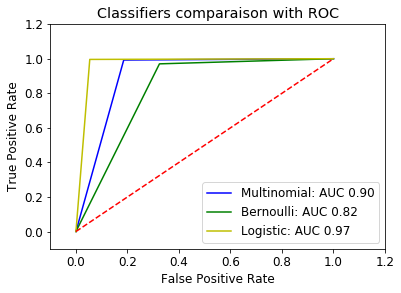

In [32]:
def formatt(x):
    if x == 'negative':
        return 0
    return 1
vfunc = np.vectorize(formatt)

cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']
for model, predicted in prediction.items():
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.map(formatt), vfunc(predicted))
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
    cmp += 1

plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Visualize the accuracy, recall and f1-score for Logistic Regression

In [33]:
print(metrics.classification_report(y_test, prediction['Logistic'], target_names = ["positive", "negative"]))

             precision    recall  f1-score   support

   positive       0.97      0.95      0.96     24323
   negative       0.99      1.00      0.99    148677

avg / total       0.99      0.99      0.99    173000



In [34]:
accuracy_score(y_test, prediction['Logistic'])


0.989

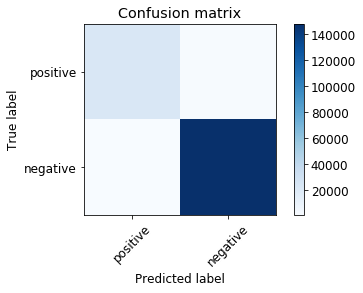

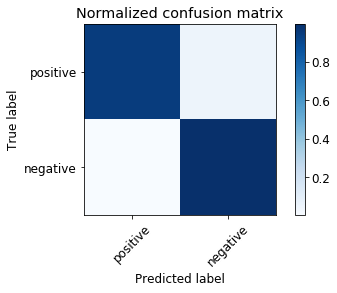

In [35]:
def plot_confusion_matrix(matrix, title='Confusion matrix', cmap=plt.cm.Blues, labels=["positive", "negative"]):
    plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
matrix = confusion_matrix(y_test, prediction['Logistic'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(matrix)    

matrix_normalized = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(matrix_normalized, title='Normalized confusion matrix')
plt.show()

## Visualize the accuracy, recall and f1-score for Naive Bayes Berrnoulli

In [36]:
print(metrics.classification_report(y_test, prediction['Bernoulli'], target_names = ["positive", "negative"]))

             precision    recall  f1-score   support

   positive       0.79      0.68      0.73     24323
   negative       0.95      0.97      0.96    148677

avg / total       0.93      0.93      0.93    173000



In [37]:
accuracy_score(y_test, prediction['Bernoulli'])

0.9288959537572254

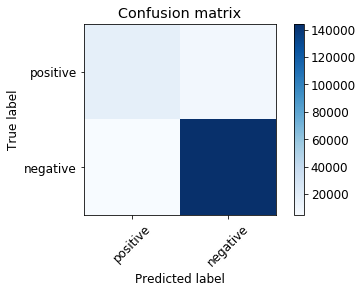

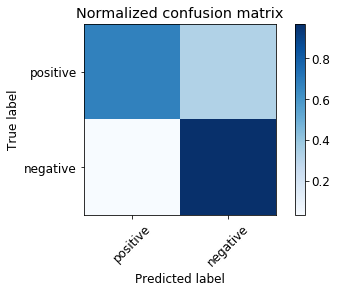

In [38]:
def plot_confusion_matrix(matrix, title='Confusion matrix', cmap=plt.cm.Blues, labels=["positive", "negative"]):
    plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
matrix = confusion_matrix(y_test, prediction['Bernoulli'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(matrix)    

matrix_normalized = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(matrix_normalized, title='Normalized confusion matrix')
plt.show()

## Visualize the accuracy, recall and f1-score for Naive Bayes Multinomial

In [39]:
print(metrics.classification_report(y_test, prediction['Multinomial'], target_names = ["positive", "negative"]))

             precision    recall  f1-score   support

   positive       0.95      0.81      0.88     24323
   negative       0.97      0.99      0.98    148677

avg / total       0.97      0.97      0.97    173000



In [40]:
accuracy_score(y_test, prediction['Multinomial'])

0.9674161849710983

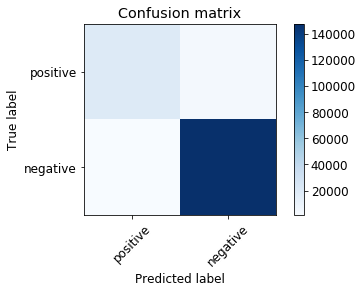

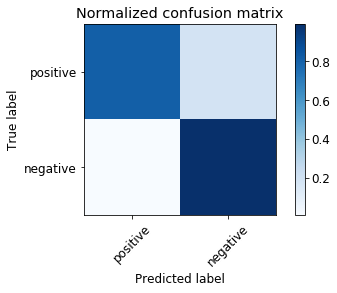

In [41]:
def plot_confusion_matrix(matrix, title='Confusion matrix', cmap=plt.cm.Blues, labels=["positive", "negative"]):
    plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
matrix = confusion_matrix(y_test, prediction['Multinomial'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(matrix)    

matrix_normalized = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(matrix_normalized, title='Normalized confusion matrix')
plt.show()

## Displaying Words Depicting The Best and Worst Features Using Logistic Model Since It Gave The Best Results

In [44]:
features = countVector.get_feature_names()
feature_coefs = pd.DataFrame(
    data = list(zip(features, logreg_result.coef_[0])),
    columns = ['feature', 'coefficient'])

feature_coefs.sort_values(by='coefficient')

,feature,coefficient
556319,worst,-31.577722
460589,terrible,-28.951763
236141,horrible,-26.890115
270357,junk,-26.858093
156690,fake,-25.532537
330702,not,-24.272021
517169,useless,-23.918038
133899,doesn,-23.215673
123547,defective,-23.115909
65389,broke,-23.068549


## Testing the Sentiments of Few Reviews 

In [43]:
def testSentiments(model, testData):
    testCounts = countVector.transform([testData])
    testTfidf = tfidf_transformer.transform(testCounts)
    result = model.predict(testTfidf)[0]
    probability = model.predict_proba(testTfidf)[0]
    print("Sample estimated as %s: negative prob %f, positive prob %f" % (result.upper(), probability[0], probability[1]))

testSentiments(logreg, "They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again")
testSentiments(logreg, "This is the cutest case EVER!  I love it because it was easy to apply.  I had to switch from the rubber one because after so many uses, it wears out like the bottom hem of a sweater that has been stretched.  This case keeps my phone intact and protected at the same time...WOO HOO!!")
testSentiments(logreg, "Use it for my Nokia N95-3 and it works very well.A bit bulky since its not really pocketable but fits in any bags for easy transport.Great for using it on airplanes since it is small and will not take up the entire table.Some keys are very touchy since I noticed that the \"E\" button will press twice.All in all a very nice product!")

Sample estimated as POSITIVE: negative prob 0.145477, positive prob 0.854523
Sample estimated as POSITIVE: negative prob 0.000008, positive prob 0.999992
Sample estimated as POSITIVE: negative prob 0.000104, positive prob 0.999896
